In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Fraud_Data.csv')

In [3]:
data.describe(include = 'all')

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,1.442330e+05,144233.000000,1.442330e+05,144233.000000,144233,144233.000000,143331.000000,144061.000000,144049,143277.000000,...,140282,77586.000000,73289,77805,140985,140985,140985,140985,140810,118666
unique,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,4,NaN,...,130,NaN,260,4,2,2,2,2,2,1786
top,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,visa,NaN,...,chrome 63.0,NaN,1920x1080,match_status:2,T,F,T,F,desktop,Windows
freq,NaN,NaN,NaN,NaN,62192,NaN,NaN,NaN,89299,NaN,...,22000,NaN,16874,60011,77814,134066,110452,73922,85165,47722
mean,3.236329e+06,0.078470,6.166958e+06,83.554533,NaN,9879.012528,391.325526,161.695504,NaN,191.166293,...,NaN,26.508597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.788496e+05,0.268911,4.807714e+06,99.850258,NaN,5047.643179,160.327848,19.410116,NaN,44.774337,...,NaN,3.737502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.987004e+06,0.000000,8.650600e+04,0.251000,NaN,1000.000000,100.000000,100.000000,NaN,100.000000,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.077142e+06,0.000000,1.885289e+06,25.453000,NaN,5713.000000,264.000000,150.000000,NaN,138.000000,...,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.198818e+06,0.000000,4.913738e+06,50.000000,NaN,9633.000000,408.000000,150.000000,NaN,224.000000,...,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.392923e+06,0.000000,1.025794e+07,100.000000,NaN,15063.000000,545.000000,185.000000,NaN,226.000000,...,NaN,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
null_per = data.isnull().sum()*100/len(data)
null_per_data = pd.DataFrame({'column_name': data.columns,'percent_missing': null_per})

In [5]:
print(null_per_data.iloc[:,1])

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
                    ...    
id_36              2.251912
id_37              2.251912
id_38              2.251912
DeviceType         2.373243
DeviceInfo        17.726179
Name: percent_missing, Length: 434, dtype: float64


In [6]:
col_names = list()
perc = list()

In [7]:
for i in null_per_data.iloc[:,0]:
    col_names.append(i)

In [8]:
for i in null_per_data.iloc[:,1]:
    perc.append(i)

In [9]:
miss_col = list()

In [10]:
for i in range(0,434):
    if perc[i]>35:
        miss_col.append(col_names[i])

In [11]:
data = data.drop(miss_col, axis = 1)

In [12]:
data

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,144.0,New,NotFound,samsung browser 6.2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,500.0,New,NotFound,mobile safari 11.0,T,F,F,T,mobile,iOS Device
2,2987010,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,...,142.0,Found,Found,chrome 62.0,F,F,T,T,desktop,Windows
3,2987011,0,86555,16.495,C,4461,375.0,185.0,mastercard,224.0,...,507.0,New,NotFound,chrome 62.0,F,F,T,T,desktop,NaN
4,2987016,0,86620,30.000,H,1790,555.0,150.0,visa,226.0,...,575.0,Found,Found,chrome 62.0,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,0,15810802,48.877,C,12019,305.0,106.0,mastercard,224.0,...,139.0,Found,Found,chrome 66.0 for android,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,1,15810876,250.000,R,1214,174.0,150.0,visa,226.0,...,333.0,New,NotFound,chrome 55.0 for android,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,0,15810912,73.838,C,5096,555.0,185.0,mastercard,137.0,...,411.0,New,NotFound,chrome 65.0 for android,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,0,15810935,400.000,R,6019,583.0,150.0,visa,226.0,...,368.0,Found,Found,chrome 66.0,T,F,T,F,desktop,MacOS


In [13]:
null_per2 = data.isnull().sum()*100/len(data)
null_per_data2 = pd.DataFrame({'column_name': data.columns,'percent_missing': null_per2})

In [14]:
col_names2 = list()
perc2 = list()

In [15]:
for i in null_per_data2.iloc[:,0]:
    col_names2.append(i)

In [16]:
for i in null_per_data2.iloc[:,1]:
    perc2.append(i)

In [17]:
miss_col2 = list()
for i in range(0,247):
    if perc2[i]>0:
        miss_col2.append(col_names2[i])

In [18]:
data.to_csv("DataAfterNullRemove.csv")

In [19]:
col_del1 = list(data.columns)

In [20]:
print(col_del1)

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', '

In [21]:
s = col_del1.index('C1')
e = col_del1.index('V321')

In [22]:
col_del2 = list()
for i in range(s,e+1):
    col_del2.append(col_del1[i])

In [23]:
mode_C1_V321 = list()
for i in col_del2:
    mode_C1_V321.append(data[i].value_counts().max())

In [24]:
print(mode_C1_V321)

[104542, 95252, 141815, 106953, 144233, 112351, 82967, 103965, 144233, 99345, 111157, 82973, 87295, 100646, 114399, 124630, 120465, 122114, 140510, 135705, 137522, 133703, 132963, 133255, 134953, 133950, 134449, 144169, 143206, 143141, 143182, 143100, 143060, 143076, 142361, 142097, 142254, 143841, 143811, 143824, 143977, 143928, 143954, 138150, 135790, 136473, 124630, 120465, 122114, 140510, 135705, 137522, 133703, 132963, 133255, 134953, 133950, 134449, 106161, 101660, 130911, 101509, 96818, 128800, 132868, 123863, 123575, 120220, 120997, 118836, 119688, 122945, 125518, 123142, 124108, 127855, 126057, 132235, 130076, 123940, 123163, 128846, 136888, 135994, 136424, 128509, 128253, 136911, 128419, 128276, 125279, 117750, 116412, 106161, 98207, 101660, 128800, 132868, 123086, 123863, 122714, 123575, 120997, 118836, 119688, 125518, 123142, 124108, 98150, 90212, 94208, 132739, 82612, 80235, 120363, 111913, 116177, 122217, 128136, 110913, 103866, 107701, 112738, 110475, 111612, 120270, 117

In [25]:
data.drop(col_del2, inplace = True, axis = 1)

In [26]:
data

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,144.0,New,NotFound,samsung browser 6.2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,500.0,New,NotFound,mobile safari 11.0,T,F,F,T,mobile,iOS Device
2,2987010,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,...,142.0,Found,Found,chrome 62.0,F,F,T,T,desktop,Windows
3,2987011,0,86555,16.495,C,4461,375.0,185.0,mastercard,224.0,...,507.0,New,NotFound,chrome 62.0,F,F,T,T,desktop,NaN
4,2987016,0,86620,30.000,H,1790,555.0,150.0,visa,226.0,...,575.0,Found,Found,chrome 62.0,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,0,15810802,48.877,C,12019,305.0,106.0,mastercard,224.0,...,139.0,Found,Found,chrome 66.0 for android,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,1,15810876,250.000,R,1214,174.0,150.0,visa,226.0,...,333.0,New,NotFound,chrome 55.0 for android,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,0,15810912,73.838,C,5096,555.0,185.0,mastercard,137.0,...,411.0,New,NotFound,chrome 65.0 for android,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,0,15810935,400.000,R,6019,583.0,150.0,visa,226.0,...,368.0,Found,Found,chrome 66.0,T,F,T,F,desktop,MacOS


In [27]:
float_miss_cols = list()
ob_miss_cols = list()

In [28]:
cols = list(data.columns)
for i in cols:
    if str(data[i].dtypes) == 'float64' or str(data[i].dtypes) == 'int64':
        float_miss_cols.append(i)
    elif str(data[i].dtypes) == 'object':
        ob_miss_cols.append(i)

In [29]:
len(float_miss_cols)

17

In [30]:
len(ob_miss_cols)

17

In [31]:
median_val = 0
for i in float_miss_cols:
    median_val = data[i].median()
    data[i] = data[i].replace(np.nan,median_val)

In [32]:
mode_val = 0
for i in ob_miss_cols:
    mode_val = (data[i].mode())[0]
    data[i] = data[i].replace(np.nan,mode_val)

In [33]:
data.describe(include='all')

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,1.442330e+05,144233.000000,1.442330e+05,144233.000000,144233,144233.000000,144233.000000,144233.000000,144233,144233.000000,...,144233.000000,144233,144233,144233,144233,144233,144233,144233,144233,144233
unique,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,4,NaN,...,NaN,2,2,130,2,2,2,2,2,1786
top,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,visa,NaN,...,NaN,Found,Found,chrome 63.0,T,F,T,F,desktop,Windows
freq,NaN,NaN,NaN,NaN,62192,NaN,NaN,NaN,89483,NaN,...,NaN,79487,78181,25951,81062,137314,113700,77170,88588,73289
mean,3.236329e+06,0.078470,6.166958e+06,83.554533,NaN,9879.012528,391.429805,161.681557,NaN,191.383920,...,406.230807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.788496e+05,0.268911,4.807714e+06,99.850258,NaN,5047.643179,159.831137,19.402738,NaN,44.705163,...,150.030243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.987004e+06,0.000000,8.650600e+04,0.251000,NaN,1000.000000,100.000000,100.000000,NaN,100.000000,...,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.077142e+06,0.000000,1.885289e+06,25.453000,NaN,5713.000000,264.000000,150.000000,NaN,138.000000,...,266.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.198818e+06,0.000000,4.913738e+06,50.000000,NaN,9633.000000,408.000000,150.000000,NaN,224.000000,...,472.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.392923e+06,0.000000,1.025794e+07,100.000000,NaN,15063.000000,545.000000,185.000000,NaN,226.000000,...,533.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
mode_high = list()
for i in ob_miss_cols:
    if data[i].value_counts().max() > 100000:
        mode_high.append(i)

In [35]:
print(mode_high)

['id_12', 'id_36', 'id_37']


In [36]:
data.drop(mode_high, inplace = True, axis = 1)

In [37]:
data

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,166.0,542.0,144.0,New,NotFound,samsung browser 6.2,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,166.0,621.0,500.0,New,NotFound,mobile safari 11.0,T,T,mobile,iOS Device
2,2987010,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,...,121.0,410.0,142.0,Found,Found,chrome 62.0,F,T,desktop,Windows
3,2987011,0,86555,16.495,C,4461,375.0,185.0,mastercard,224.0,...,225.0,176.0,507.0,New,NotFound,chrome 62.0,F,T,desktop,Windows
4,2987016,0,86620,30.000,H,1790,555.0,150.0,visa,226.0,...,166.0,529.0,575.0,Found,Found,chrome 62.0,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,0,15810802,48.877,C,12019,305.0,106.0,mastercard,224.0,...,225.0,427.0,139.0,Found,Found,chrome 66.0 for android,F,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,1,15810876,250.000,R,1214,174.0,150.0,visa,226.0,...,166.0,352.0,333.0,New,NotFound,chrome 55.0 for android,T,F,mobile,A574BL Build/NMF26F
144230,3577529,0,15810912,73.838,C,5096,555.0,185.0,mastercard,137.0,...,225.0,567.0,411.0,New,NotFound,chrome 65.0 for android,F,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,0,15810935,400.000,R,6019,583.0,150.0,visa,226.0,...,166.0,352.0,368.0,Found,Found,chrome 66.0,T,F,desktop,MacOS


In [38]:
correlation = data.corr()
correlation.to_csv('Corr1.csv')

In [39]:
data.drop(['TransactionID','TransactionDT'], inplace = True, axis = 1)

In [40]:
data

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,P_emaildomain,...,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_38,DeviceType,DeviceInfo
0,0,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,gmail.com,...,166.0,542.0,144.0,New,NotFound,samsung browser 6.2,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,0,15.000,H,2803,100.0,150.0,visa,226.0,debit,anonymous.com,...,166.0,621.0,500.0,New,NotFound,mobile safari 11.0,T,T,mobile,iOS Device
2,0,75.887,C,16496,352.0,117.0,mastercard,134.0,credit,gmail.com,...,121.0,410.0,142.0,Found,Found,chrome 62.0,F,T,desktop,Windows
3,0,16.495,C,4461,375.0,185.0,mastercard,224.0,debit,hotmail.com,...,225.0,176.0,507.0,New,NotFound,chrome 62.0,F,T,desktop,Windows
4,0,30.000,H,1790,555.0,150.0,visa,226.0,debit,aol.com,...,166.0,529.0,575.0,Found,Found,chrome 62.0,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,0,48.877,C,12019,305.0,106.0,mastercard,224.0,debit,yahoo.fr,...,225.0,427.0,139.0,Found,Found,chrome 66.0 for android,F,F,mobile,F3111 Build/33.3.A.1.97
144229,1,250.000,R,1214,174.0,150.0,visa,226.0,credit,gmail.com,...,166.0,352.0,333.0,New,NotFound,chrome 55.0 for android,T,F,mobile,A574BL Build/NMF26F
144230,0,73.838,C,5096,555.0,185.0,mastercard,137.0,credit,gmail.com,...,225.0,567.0,411.0,New,NotFound,chrome 65.0 for android,F,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,0,400.000,R,6019,583.0,150.0,visa,226.0,credit,gmail.com,...,166.0,352.0,368.0,Found,Found,chrome 66.0,T,F,desktop,MacOS


In [41]:
num = []
for i in data.columns:
    if data[i].dtypes != 'object':
        num.append(i)
num

['isFraud',
 'TransactionAmt',
 'card1',
 'card2',
 'card3',
 'card5',
 'id_01',
 'id_02',
 'id_05',
 'id_06',
 'id_11',
 'id_13',
 'id_17',
 'id_19',
 'id_20']

In [42]:
num.remove('isFraud')

In [43]:
num

['TransactionAmt',
 'card1',
 'card2',
 'card3',
 'card5',
 'id_01',
 'id_02',
 'id_05',
 'id_06',
 'id_11',
 'id_13',
 'id_17',
 'id_19',
 'id_20']

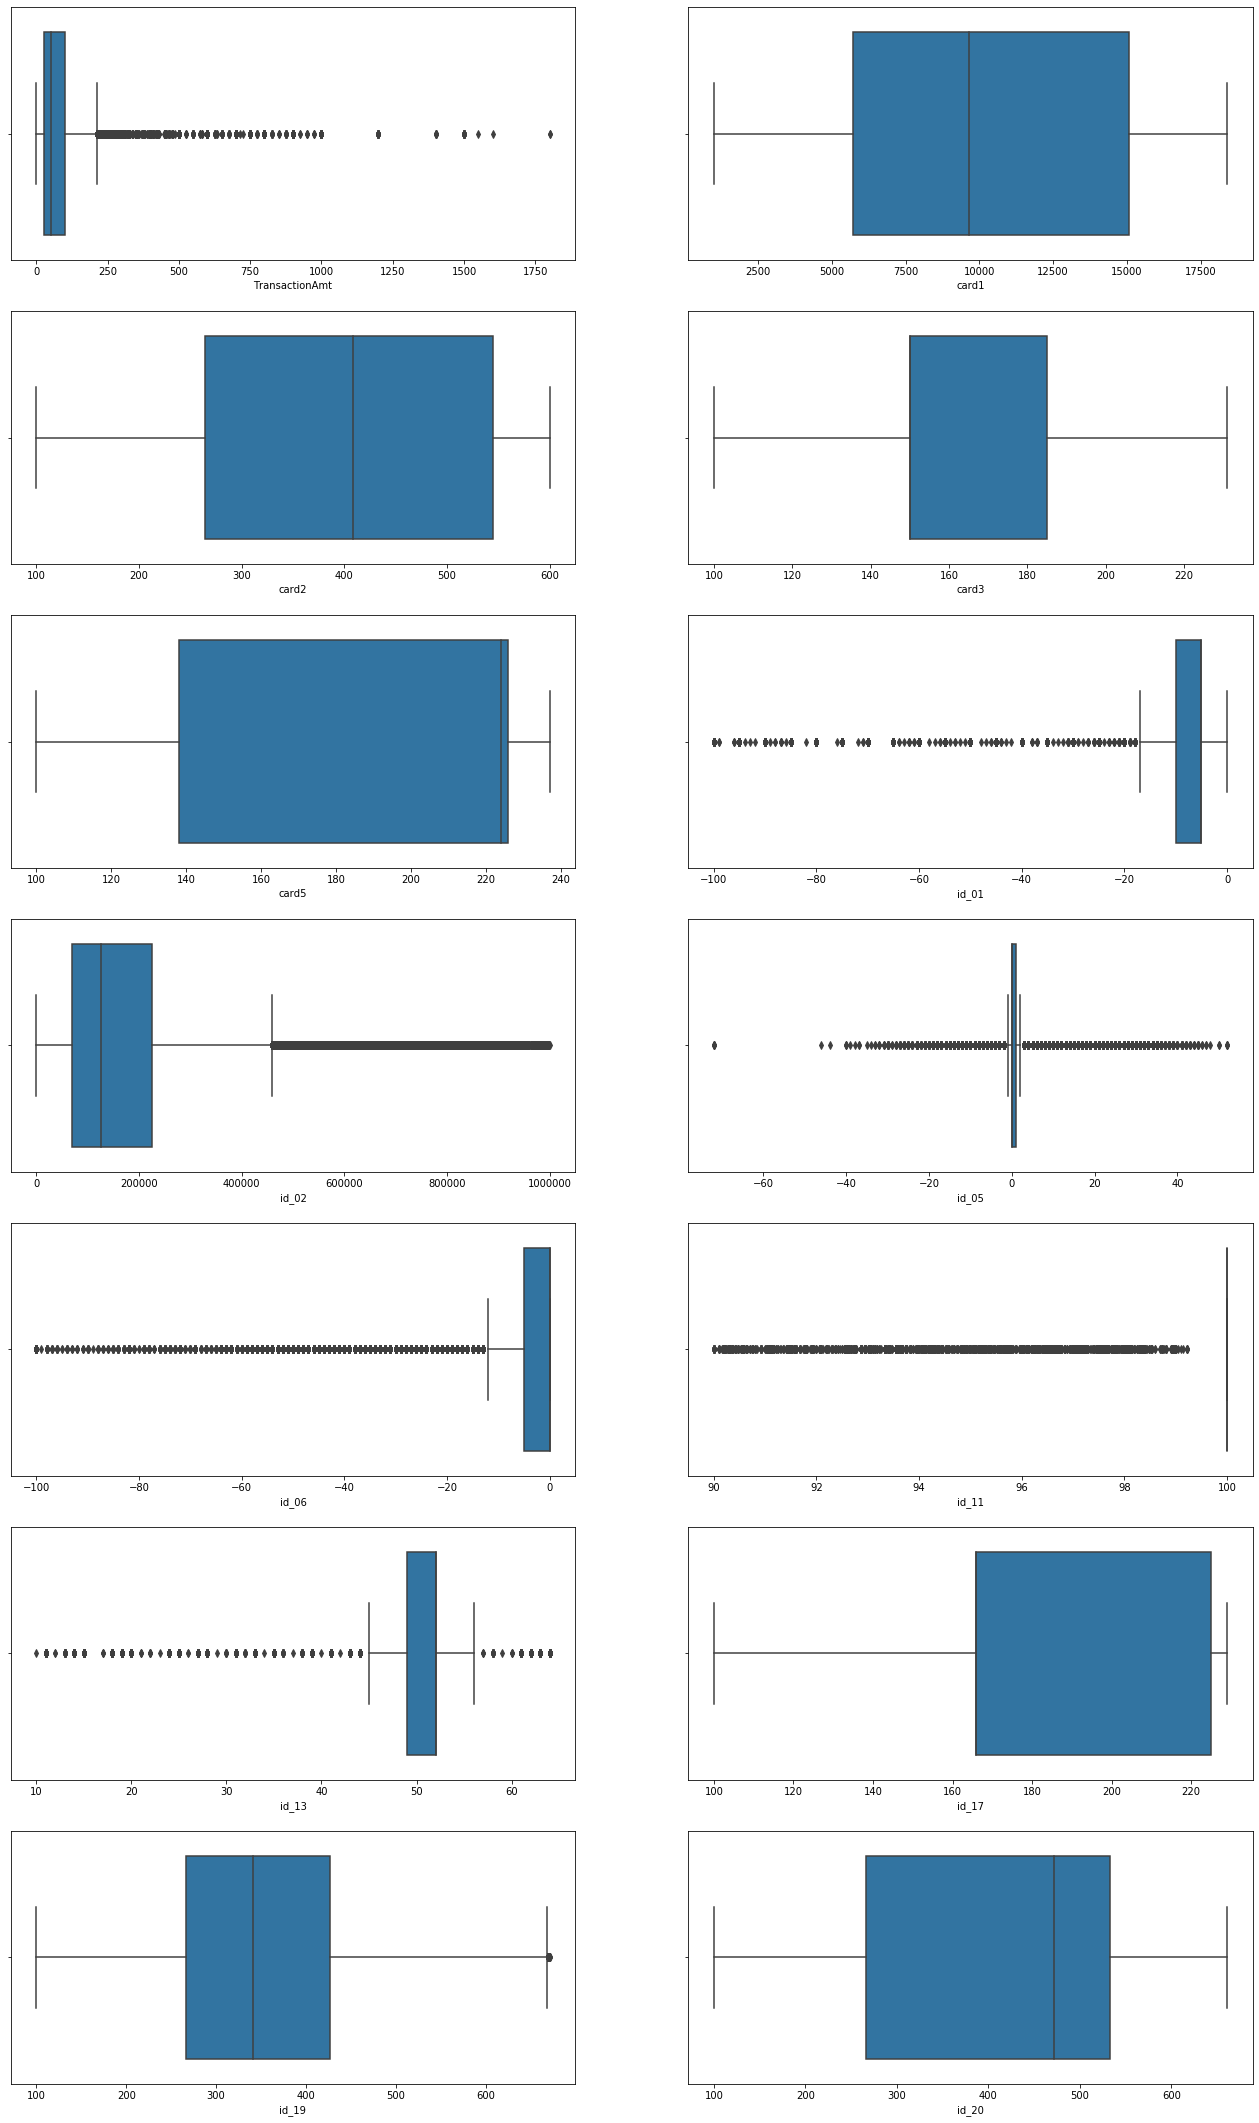

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
c = 1
plt.figure()
for i in num:
    plt.subplot(19,2,c)
    sns.boxplot(data[i])
    c += 1
plt.subplots_adjust(right = 3,top = 20)
plt.show()

In [45]:
data.drop(['id_05','id_11'], inplace = True, axis = 1)

In [46]:
num.remove('id_05')
num.remove('id_11')

In [47]:
p25 = list()
p75 = list()
iqr = list()
iqrll = list()
iqrul = list()
for i in num:
    p25.append(data[i].quantile(q=0.25))
    p75.append(data[i].quantile(q=0.75))

for i in range(len(p25)):
    iqr.append(p75[i]-p25[i])
    
for i in range(len(p25)):
    iqrll.append(p25[i]-1.5*iqr[i])
    iqrul.append(p75[i]+1.5*iqr[i])

j = 0
for i in num:
    data.loc[data[i]>iqrul[j],i] = data[i].quantile(q=0.95)
    data.loc[data[i]<iqrll[j],i] = data[i].quantile(q=0.05)
    j += 1

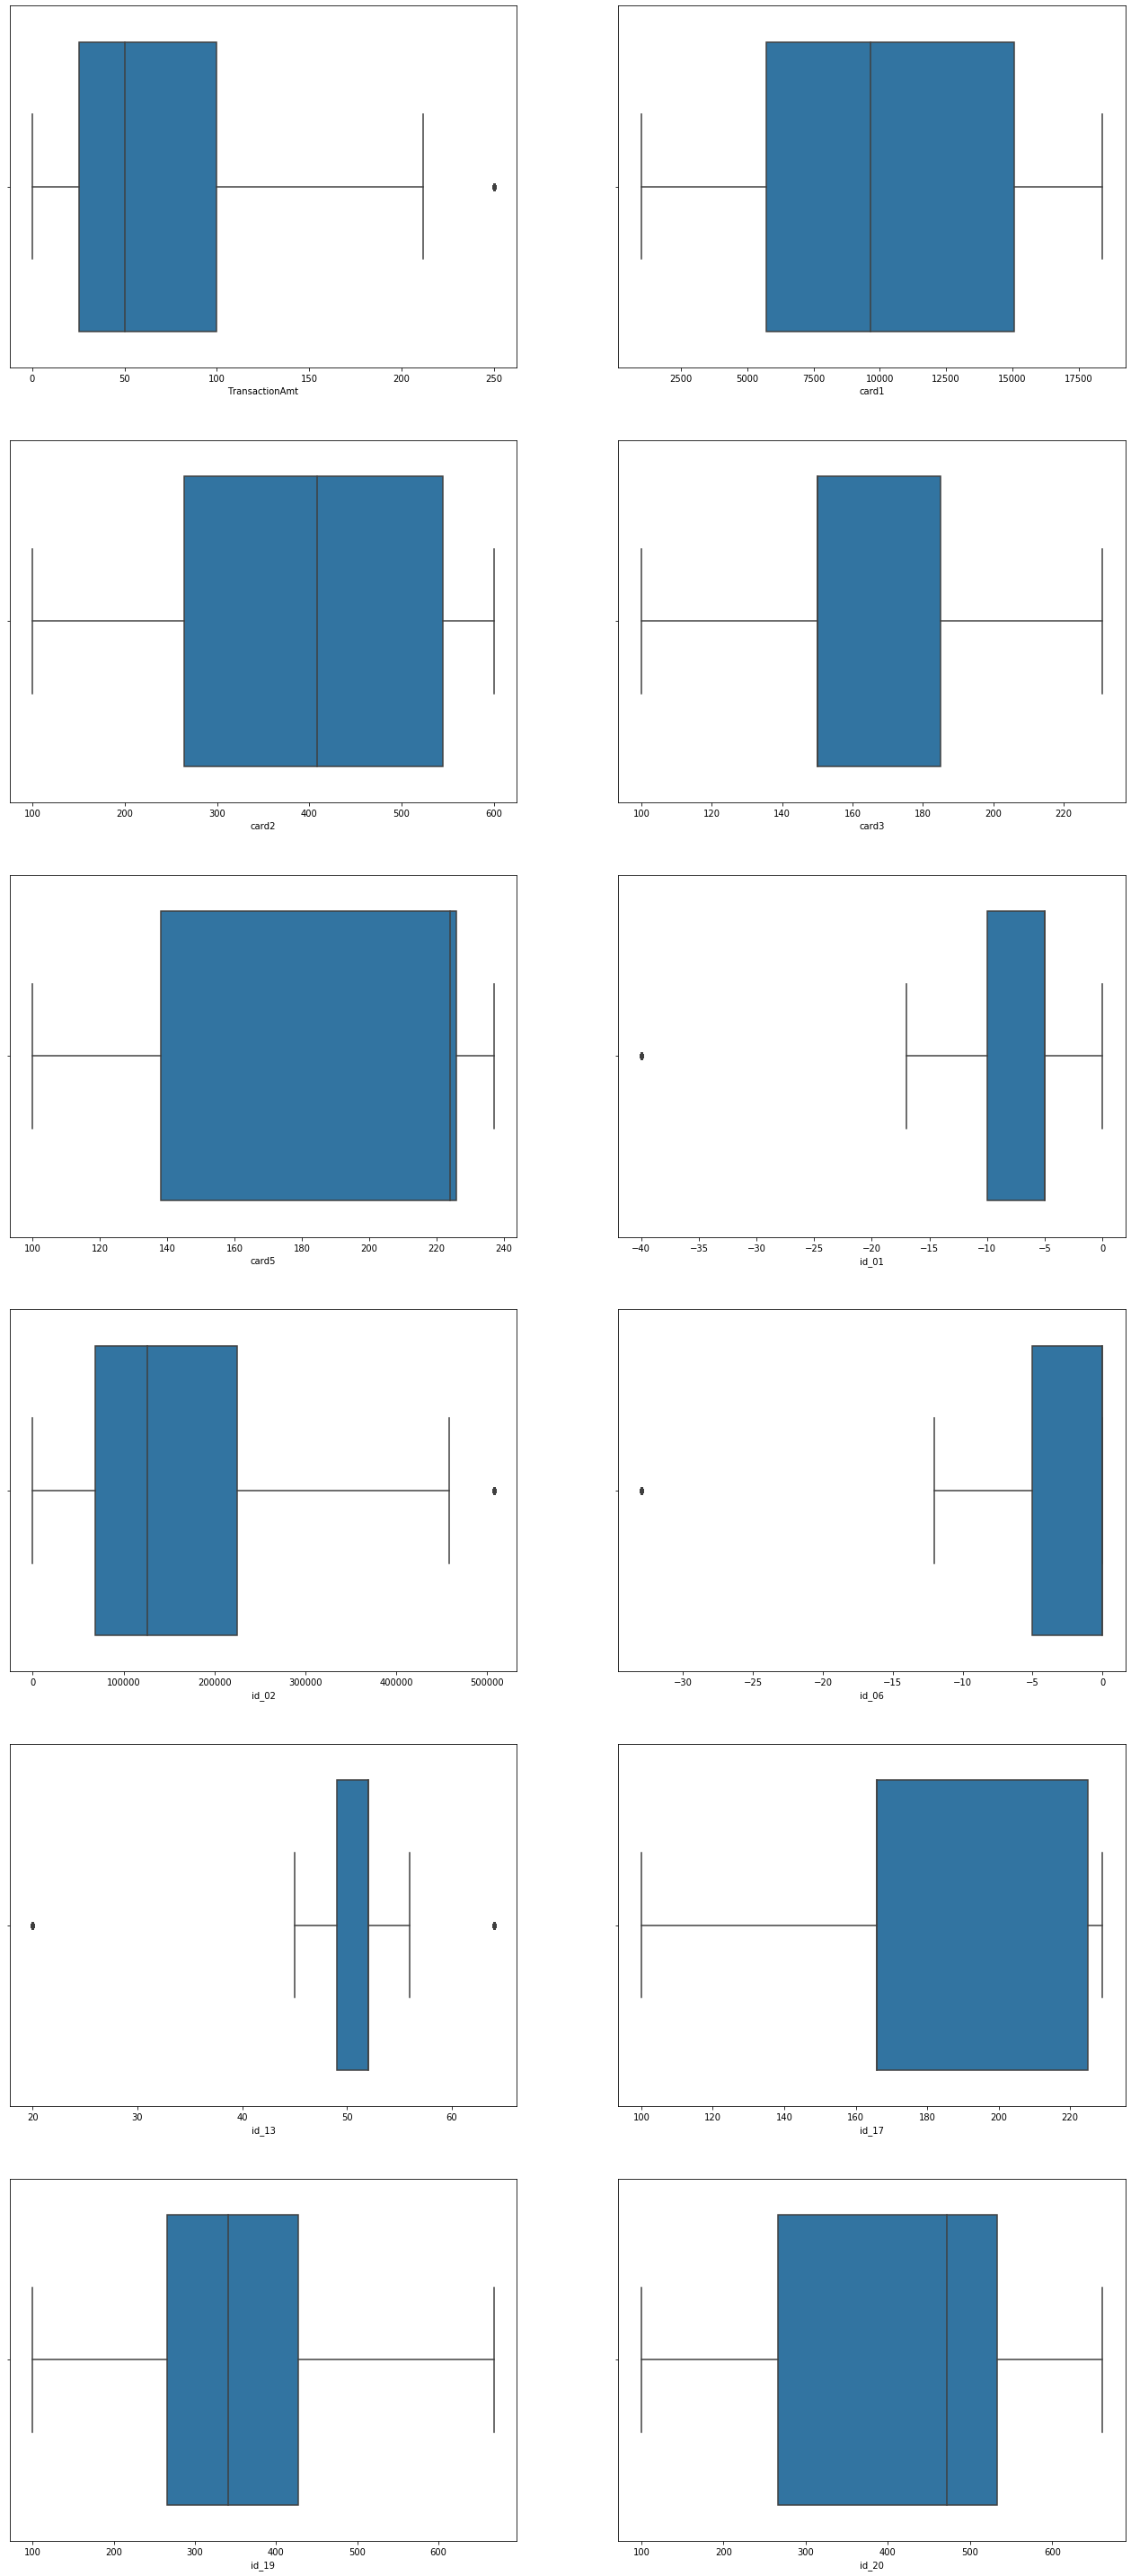

In [48]:
import seaborn as sns
c = 1
plt.figure()
for i in num:
    plt.subplot(12,2,c)
    sns.boxplot(data[i])
    c += 1
plt.subplots_adjust(right = 3,top = 20)
plt.show()

In [49]:
cat = list()
for i in data.columns:
    if data[i].dtypes == 'object':
        cat.append(i)
cat

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'id_15',
 'id_16',
 'id_28',
 'id_29',
 'id_31',
 'id_35',
 'id_38',
 'DeviceType',
 'DeviceInfo']

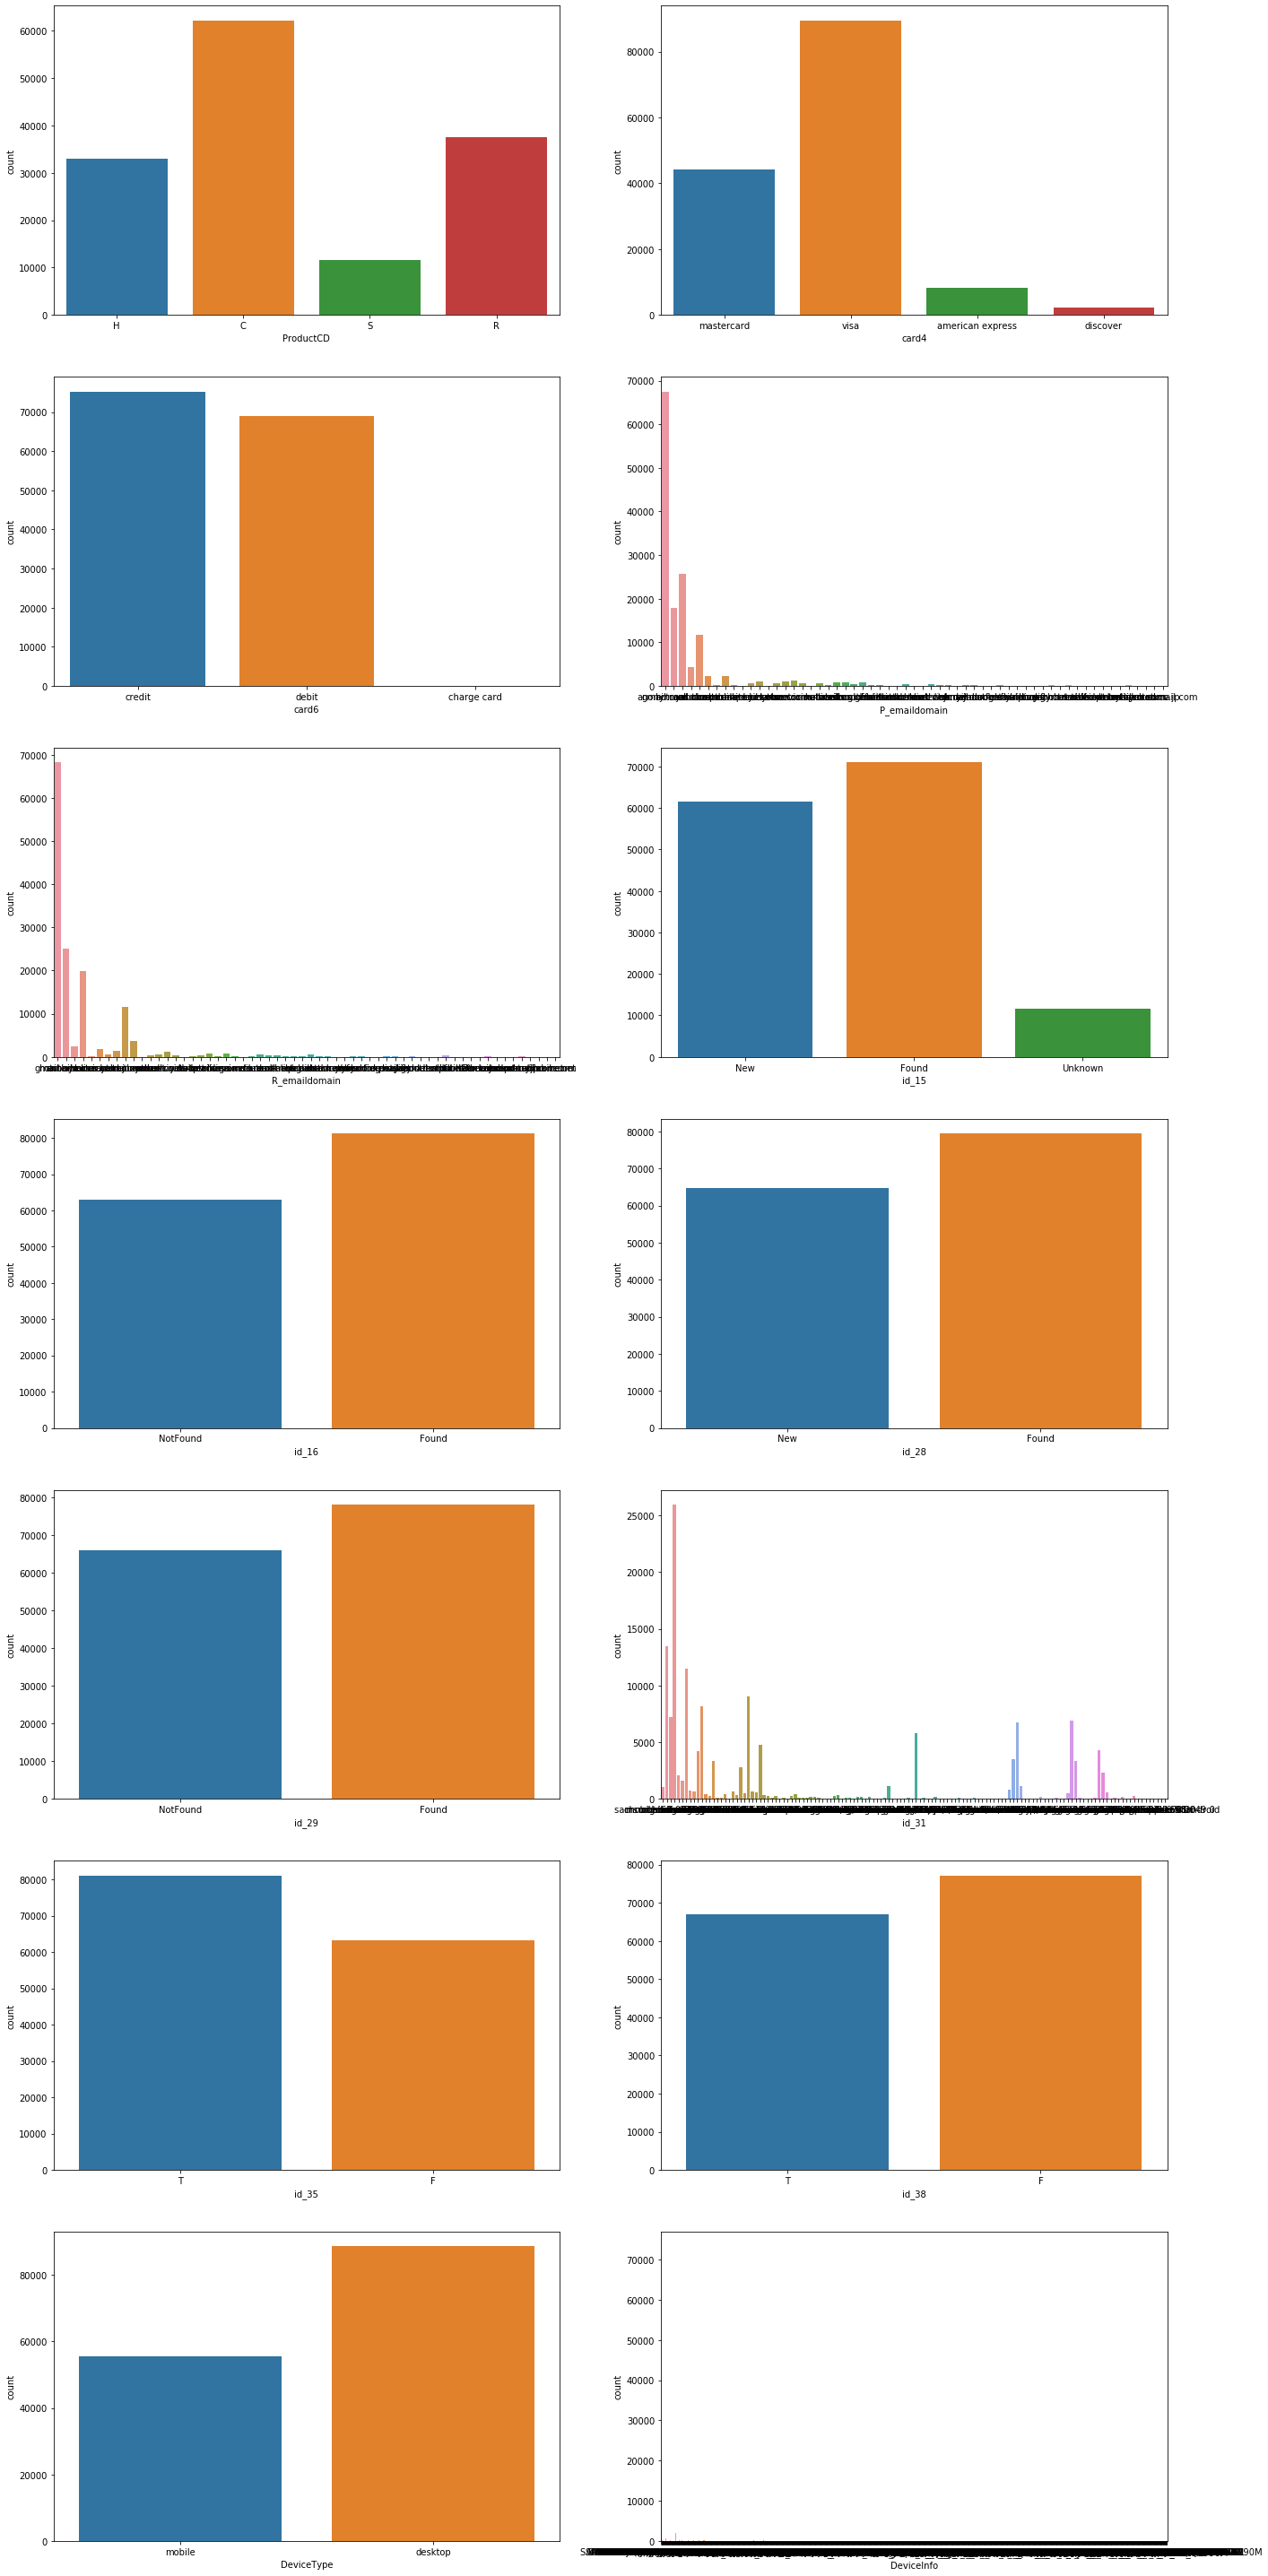

In [50]:
c = 1
plt.figure()
for i in cat:
    plt.subplot(14,2,c)
    sns.countplot(x = i, data = data)
    c += 1
plt.subplots_adjust(right = 3,top = 20)
plt.show()

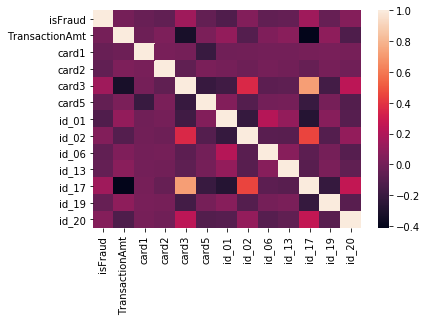

In [51]:
sns.heatmap(data.corr())

In [52]:
print(list(data['DeviceInfo'].value_counts()))

[73289, 19782, 12573, 7440, 1901, 962, 549, 461, 410, 362, 334, 328, 316, 312, 290, 274, 269, 256, 235, 225, 219, 209, 203, 190, 184, 182, 178, 172, 171, 169, 160, 157, 154, 150, 147, 144, 144, 137, 136, 135, 134, 130, 129, 129, 125, 122, 120, 117, 113, 113, 113, 112, 112, 111, 110, 108, 106, 106, 105, 105, 104, 102, 102, 98, 97, 96, 94, 94, 93, 92, 91, 91, 91, 89, 89, 88, 88, 86, 86, 85, 85, 84, 83, 82, 81, 81, 77, 76, 76, 75, 74, 73, 73, 71, 71, 70, 69, 68, 68, 67, 67, 67, 67, 67, 66, 65, 65, 65, 65, 65, 63, 63, 63, 61, 61, 61, 61, 61, 60, 60, 60, 60, 60, 60, 59, 59, 59, 59, 58, 58, 57, 57, 56, 56, 54, 54, 53, 53, 52, 52, 51, 50, 50, 50, 50, 50, 50, 49, 49, 47, 47, 47, 46, 46, 46, 46, 45, 45, 45, 45, 45, 44, 44, 44, 44, 43, 43, 43, 42, 42, 42, 42, 40, 40, 40, 39, 38, 38, 38, 38, 38, 37, 37, 37, 37, 37, 37, 37, 37, 36, 36, 36, 35, 35, 35, 35, 34, 34, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 31, 31, 31, 30, 30, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 

In [53]:
import random
l = ['iOS Device','MacOS']
j = 0
for i in data['DeviceInfo']:
    if i != 'Windows' and i != 'iOS Device' and i != 'MacOS':
        data['DeviceInfo'][j] = random.choice(l)
    j += 1

C:\Users\vigil\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
data['DeviceInfo'].value_counts()

Windows       73289
iOS Device    39154
MacOS         31790
Name: DeviceInfo, dtype: int64

In [55]:
print(list(data['id_31'].value_counts()))

[25951, 13423, 11474, 9030, 8195, 7182, 6871, 6711, 5806, 4778, 4264, 4188, 3473, 3336, 3315, 2779, 2349, 2097, 1600, 1158, 1099, 1061, 833, 719, 673, 647, 642, 550, 541, 538, 509, 428, 419, 394, 371, 325, 312, 302, 285, 262, 238, 227, 225, 222, 210, 188, 179, 159, 152, 150, 145, 138, 133, 126, 111, 110, 101, 100, 98, 97, 94, 87, 83, 82, 81, 79, 78, 74, 72, 69, 64, 62, 61, 58, 57, 56, 56, 55, 55, 55, 54, 53, 52, 49, 46, 46, 45, 43, 43, 42, 41, 37, 37, 36, 33, 25, 20, 19, 18, 16, 14, 11, 9, 8, 6, 6, 6, 5, 5, 5, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [56]:
data.drop(['id_31'], inplace = True, axis = 1)

In [57]:
import random
l = ['hotmail.com','anonymous.com','yahoo.com']
j = 0
for i in data['P_emaildomain']:
    if i != 'gmail.com' and i != 'hotmail.com' and i != 'anonymous.com' and i != 'yahoo.com':
        data['P_emaildomain'][j] = random.choice(l)
    j += 1

C:\Users\vigil\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
data['P_emaildomain'].value_counts()

gmail.com        67531
hotmail.com      32957
anonymous.com    24912
yahoo.com        18833
Name: P_emaildomain, dtype: int64

In [59]:
import random
l = ['hotmail.com','anonymous.com','yahoo.com']
j = 0
for i in data['R_emaildomain']:
    if i != 'gmail.com' and i != 'hotmail.com' and i != 'anonymous.com' and i != 'yahoo.com':
        data['R_emaildomain'][j] = random.choice(l)
    j += 1

C:\Users\vigil\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
data['R_emaildomain'].value_counts()

gmail.com        68229
hotmail.com      31534
anonymous.com    26253
yahoo.com        18217
Name: R_emaildomain, dtype: int64

In [61]:
data['card6'].value_counts()

credit         75268
debit          68950
charge card       15
Name: card6, dtype: int64

In [62]:
j = 0
for i in data['card6']:
    if i == 'charge card':
        data['card6'][j] = 'debit'
    j += 1

C:\Users\vigil\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [63]:
data['card6'].value_counts()

credit    75268
debit     68965
Name: card6, dtype: int64

In [64]:
l = ['H','R']
j = 0
for i in data['ProductCD']:
    if i == 'S':
        data['ProductCD'][j] = random.choice(l)
    j += 1

C:\Users\vigil\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [65]:
data['ProductCD'].value_counts()

C    62192
R    43418
H    38623
Name: ProductCD, dtype: int64

In [66]:
j = 0
for i in data['card4']:
    if i == 'american express' or i == 'discover':
        data['card4'][j] = 'mastercard'
    j += 1

C:\Users\vigil\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [67]:
data['card4'].value_counts()

visa          89483
mastercard    54750
Name: card4, dtype: int64

In [68]:
l = ['New','Found']
j = 0
for i in data['id_15']:
    if i == 'Unknown':
        data['id_15'][j] = random.choice(l)
    j += 1

C:\Users\vigil\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [69]:
data['id_15'].value_counts()

Found    76660
New      67573
Name: id_15, dtype: int64

In [70]:
cat = list()
for i in data.columns:
    if data[i].dtypes == 'object':
        cat.append(i)
cat

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'id_15',
 'id_16',
 'id_28',
 'id_29',
 'id_35',
 'id_38',
 'DeviceType',
 'DeviceInfo']

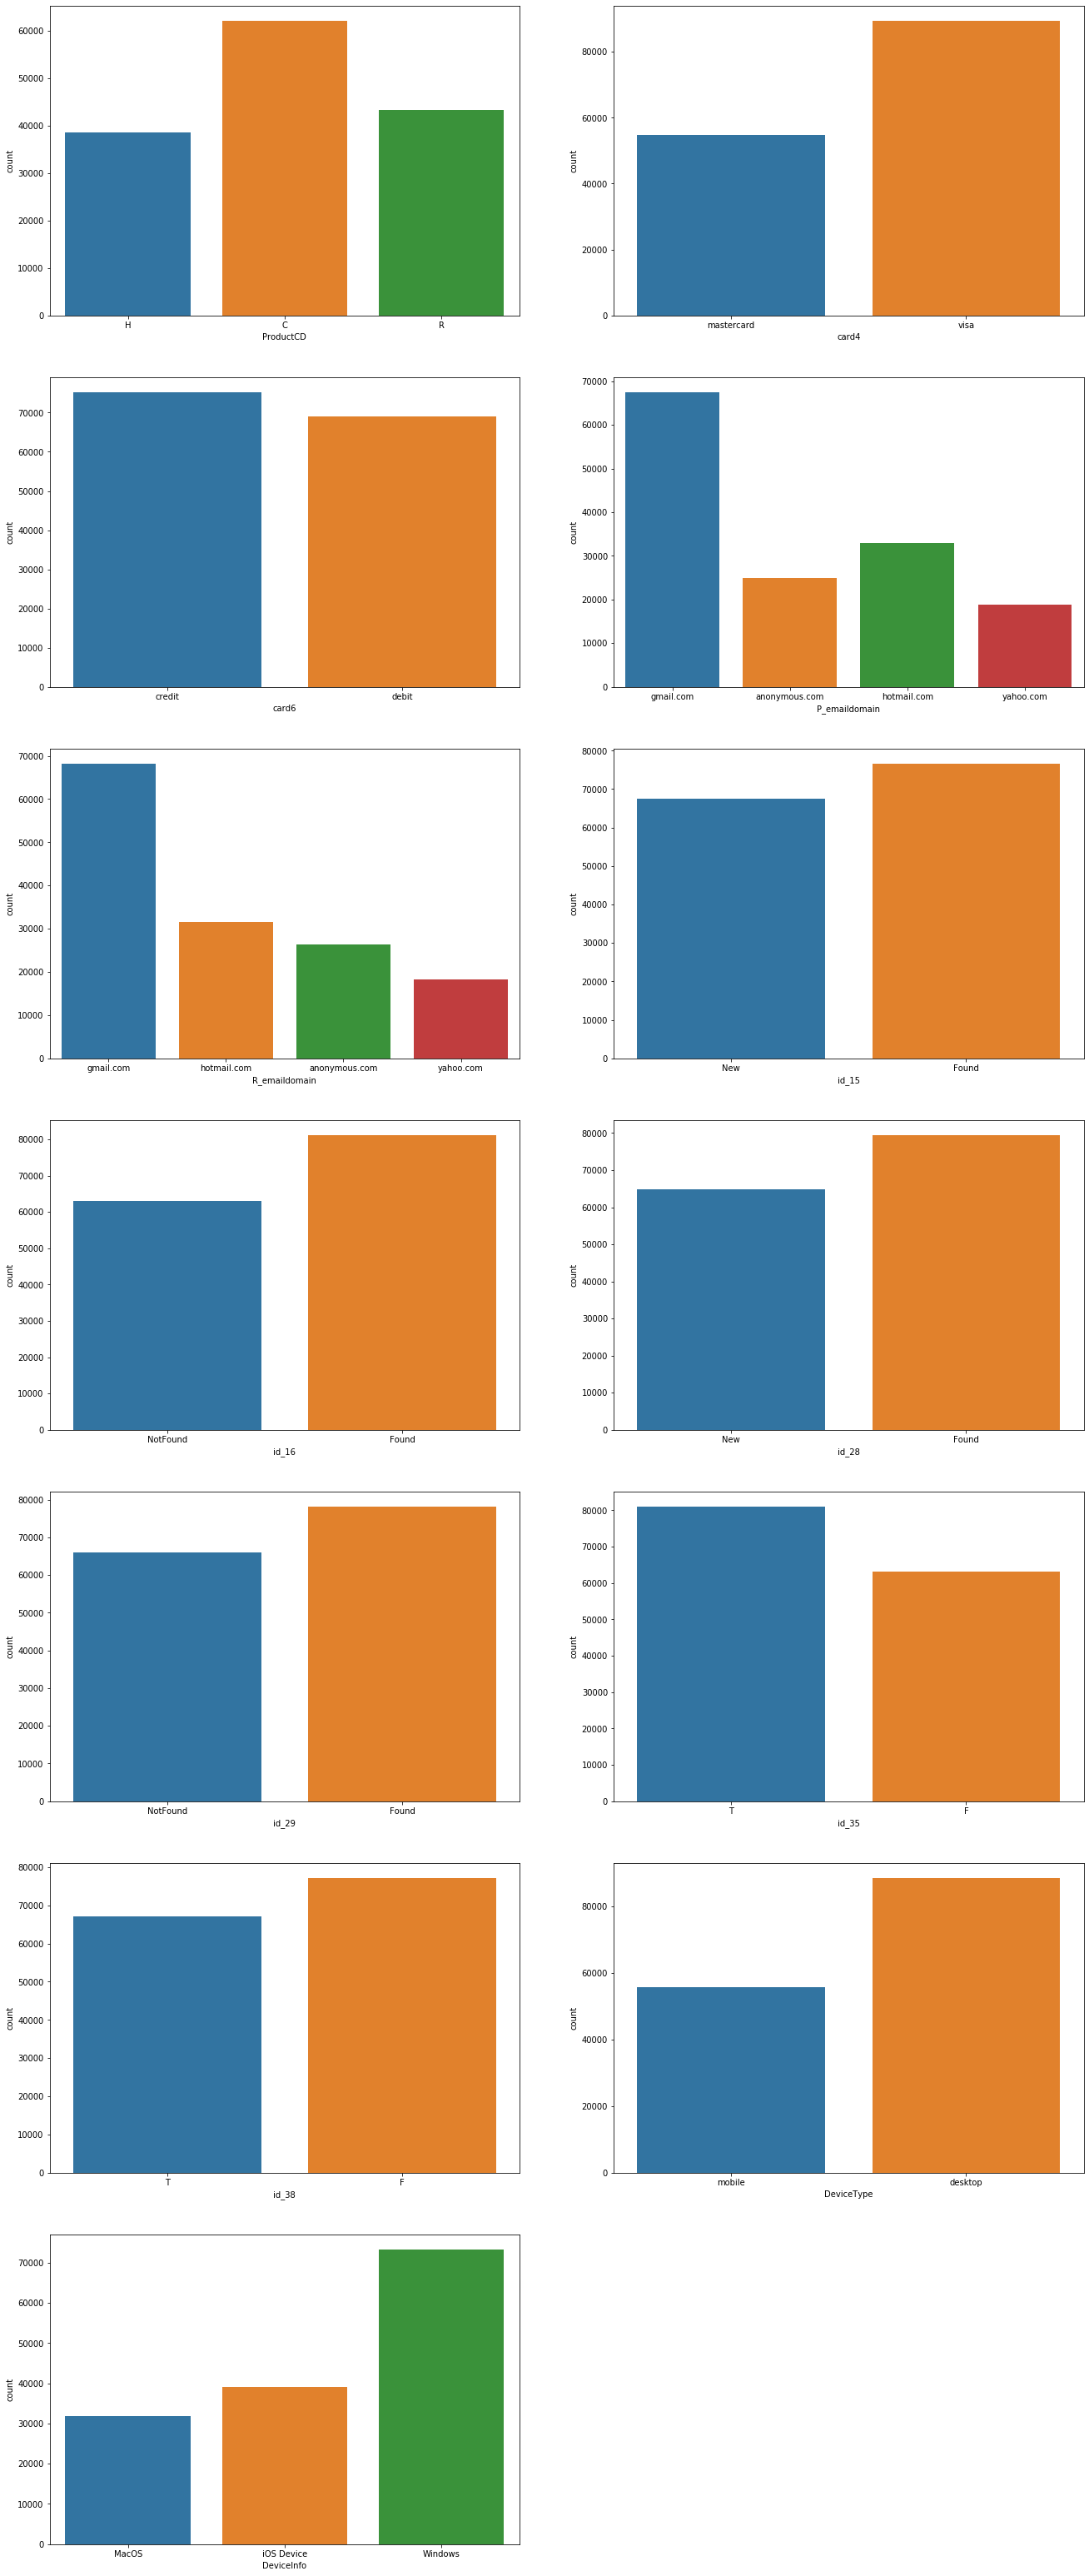

In [71]:
c = 1
plt.figure()
for i in cat:
    plt.subplot(13,2,c)
    sns.countplot(x = i, data = data)
    c += 1
plt.subplots_adjust(right = 3,top = 20)
plt.show()

In [72]:
num = list()
for i in data.columns:
    if data[i].dtypes != 'object':
        num.append(i)
num

['isFraud',
 'TransactionAmt',
 'card1',
 'card2',
 'card3',
 'card5',
 'id_01',
 'id_02',
 'id_06',
 'id_13',
 'id_17',
 'id_19',
 'id_20']

In [73]:
num.remove('isFraud')

In [74]:
num

['TransactionAmt',
 'card1',
 'card2',
 'card3',
 'card5',
 'id_01',
 'id_02',
 'id_06',
 'id_13',
 'id_17',
 'id_19',
 'id_20']

In [75]:
def z_score(df):
    df_std = df.copy()
    for column in num:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
    return df_std

data_standardized = z_score(data)


In [76]:
data_standardized

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,P_emaildomain,...,id_16,id_17,id_19,id_20,id_28,id_29,id_35,id_38,DeviceType,DeviceInfo
0,0,-0.400141,H,-1.066243,0.766873,-0.602057,mastercard,-1.999409,credit,gmail.com,...,NotFound,-0.751408,1.365740,-1.747853,New,NotFound,T,T,mobile,MacOS
1,0,-0.933594,H,-1.401845,-1.823361,-0.602057,visa,0.774319,debit,anonymous.com,...,NotFound,-0.751408,1.935645,0.625002,New,NotFound,T,T,mobile,iOS Device
2,0,-0.005585,C,1.310906,-0.246697,-2.302848,mastercard,-1.283608,credit,gmail.com,...,Found,-2.243580,0.413493,-1.761184,Found,Found,F,T,desktop,Windows
3,0,-0.910808,C,-1.073375,-0.102795,1.201812,mastercard,0.729582,debit,hotmail.com,...,NotFound,1.204994,-1.274579,0.671659,New,NotFound,F,T,desktop,Windows
4,0,-0.704972,H,-1.602533,1.023394,-0.602057,visa,0.774319,debit,yahoo.com,...,Found,-0.751408,1.271958,1.124901,Found,Found,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,0,-0.417258,C,0.423958,-0.540757,-2.869778,mastercard,0.729582,debit,yahoo.com,...,Found,1.204994,0.536131,-1.781180,Found,Found,F,F,mobile,MacOS
144229,1,2.648160,R,-1.716645,-1.360372,-0.602057,visa,0.774319,credit,gmail.com,...,NotFound,-0.751408,-0.004918,-0.488107,New,NotFound,T,F,mobile,iOS Device
144230,0,-0.036814,C,-0.947573,1.023394,1.201812,mastercard,-1.216502,credit,gmail.com,...,NotFound,1.204994,1.546089,0.031788,New,NotFound,F,F,mobile,iOS Device
144231,0,2.648160,R,-0.764716,1.198579,-0.602057,visa,0.774319,credit,gmail.com,...,Found,-0.751408,-0.004918,-0.254821,Found,Found,T,F,desktop,MacOS


(array([16878., 31253., 29086.,  6752.,  9039., 20906.,  2191.,  3233.,
         8669.,   473.,   768.,  6206.,   123.,     0.,  8656.]),
 array([-1.15839118, -0.90462111, -0.65085105, -0.39708098, -0.14331092,
         0.11045915,  0.36422921,  0.61799928,  0.87176934,  1.12553941,
         1.37930947,  1.63307954,  1.8868496 ,  2.14061967,  2.39438973,
         2.6481598 ]),
 <a list of 15 Patch objects>)

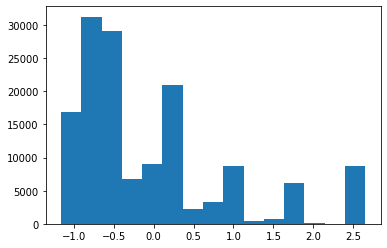

In [85]:
plt.hist(data_standardized['TransactionAmt'],15)

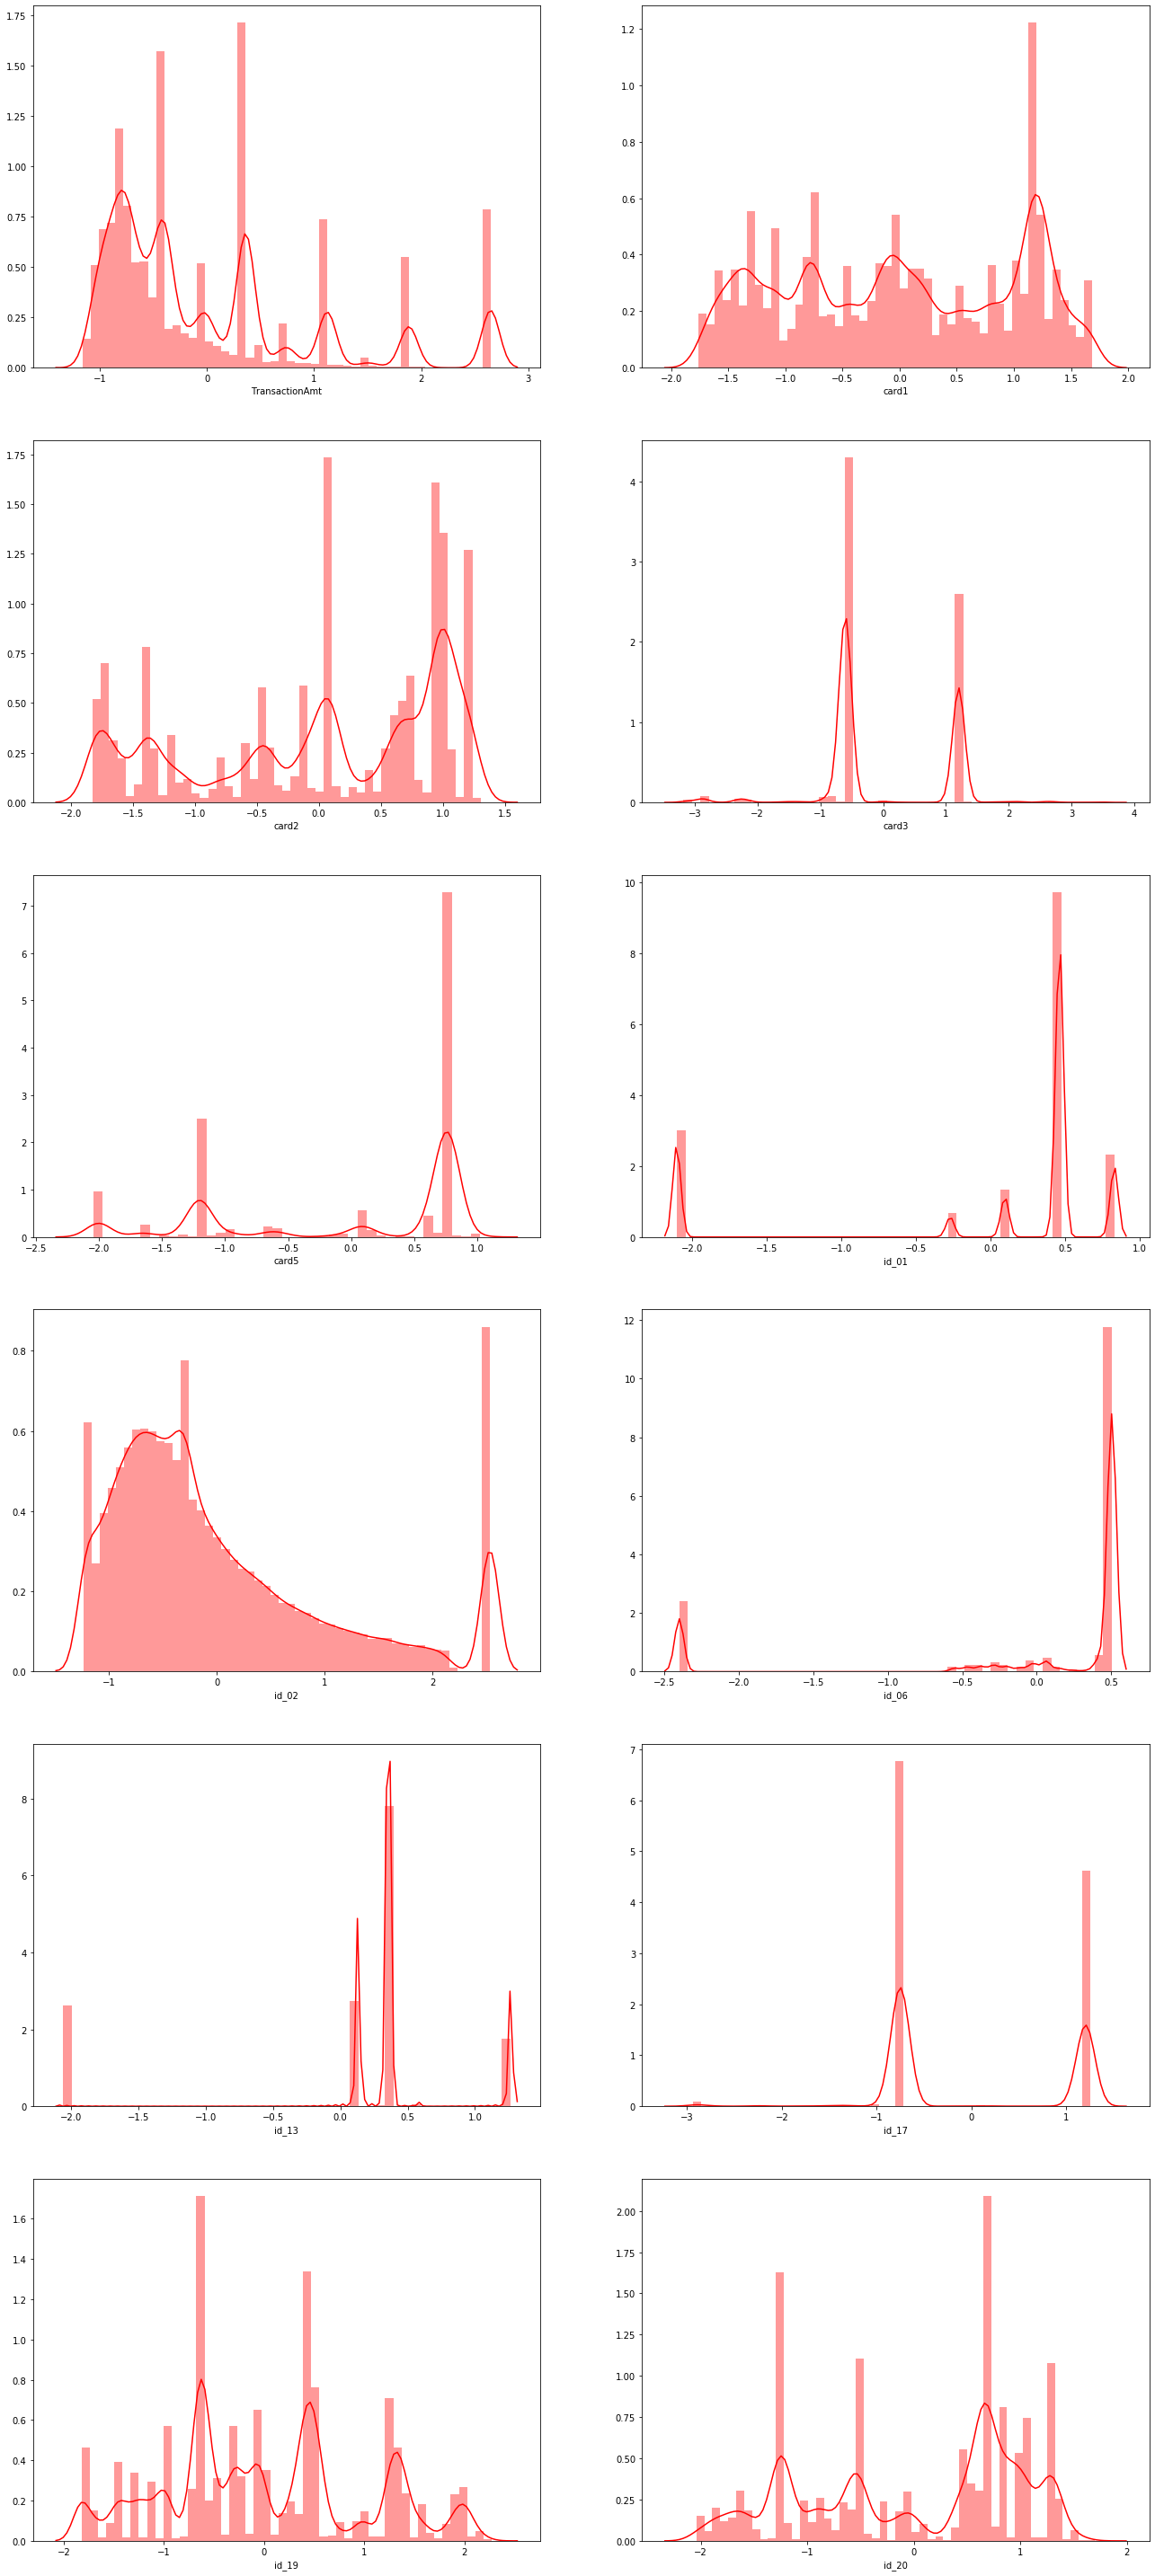

In [77]:
c = 1
plt.figure()
for i in num:
    plt.subplot(12,2,c)
    sns.distplot(data_standardized[i],color = 'r')
    c += 1
plt.subplots_adjust(right = 3,top = 20)
plt.show()

In [86]:
for i in cat:
    data[i] = data[i].astype('category').cat.codes

In [88]:
data[data.columns[0:]].corr()['isFraud'][:]

isFraud           1.000000
TransactionAmt    0.013339
ProductCD        -0.133694
card1            -0.034573
card2            -0.057067
card3             0.148371
card4            -0.002112
card5            -0.047943
card6            -0.041225
P_emaildomain    -0.016282
R_emaildomain     0.002405
id_01            -0.117925
id_02             0.053195
id_06            -0.053145
id_13            -0.043424
id_15            -0.089362
id_16            -0.099017
id_17             0.148954
id_19            -0.040892
id_20             0.059370
id_28            -0.087896
id_29            -0.092740
id_35            -0.144881
id_38            -0.065621
DeviceType        0.068353
DeviceInfo        0.014464
Name: isFraud, dtype: float64

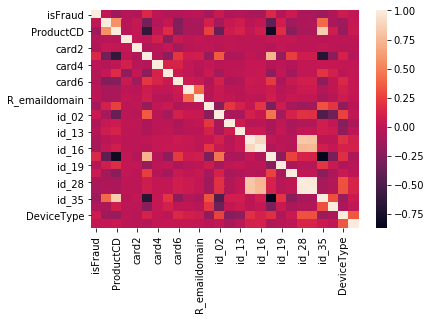

In [90]:
sns.heatmap(data[data.columns[0:]].corr())

In [79]:
def min_max_scaling(df):
    df_norm = df.copy()
    for column in num:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# call the min_max_scaling function
data_normalized = min_max_scaling(data)

data_normalized

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,P_emaildomain,...,id_16,id_17,id_19,id_20,id_28,id_29,id_35,id_38,DeviceType,DeviceInfo
0,0,0.199196,H,0.201023,0.828,0.381679,mastercard,0.014599,credit,gmail.com,...,NotFound,0.511628,0.778169,0.078431,New,NotFound,T,T,mobile,MacOS
1,0,0.059055,H,0.103645,0.000,0.381679,visa,0.919708,debit,anonymous.com,...,NotFound,0.511628,0.917254,0.713012,New,NotFound,T,T,mobile,iOS Device
2,0,0.302848,C,0.890779,0.504,0.129771,mastercard,0.248175,credit,gmail.com,...,Found,0.162791,0.545775,0.074866,Found,Found,F,T,desktop,Windows
3,0,0.065041,C,0.198954,0.550,0.648855,mastercard,0.905109,debit,hotmail.com,...,NotFound,0.968992,0.133803,0.725490,New,NotFound,F,T,desktop,Windows
4,0,0.119116,H,0.045413,0.910,0.381679,visa,0.919708,debit,yahoo.com,...,Found,0.511628,0.755282,0.846702,Found,Found,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,0,0.194699,C,0.633421,0.410,0.045802,mastercard,0.905109,debit,yahoo.com,...,Found,0.968992,0.575704,0.069519,Found,Found,F,F,mobile,MacOS
144229,1,1.000000,R,0.012302,0.148,0.381679,visa,0.919708,credit,gmail.com,...,NotFound,0.511628,0.443662,0.415330,New,NotFound,T,F,mobile,iOS Device
144230,0,0.294644,C,0.235456,0.910,0.648855,mastercard,0.270073,credit,gmail.com,...,NotFound,0.968992,0.822183,0.554367,New,NotFound,F,F,mobile,iOS Device
144231,0,1.000000,R,0.288515,0.966,0.381679,visa,0.919708,credit,gmail.com,...,Found,0.511628,0.443662,0.477718,Found,Found,T,F,desktop,MacOS


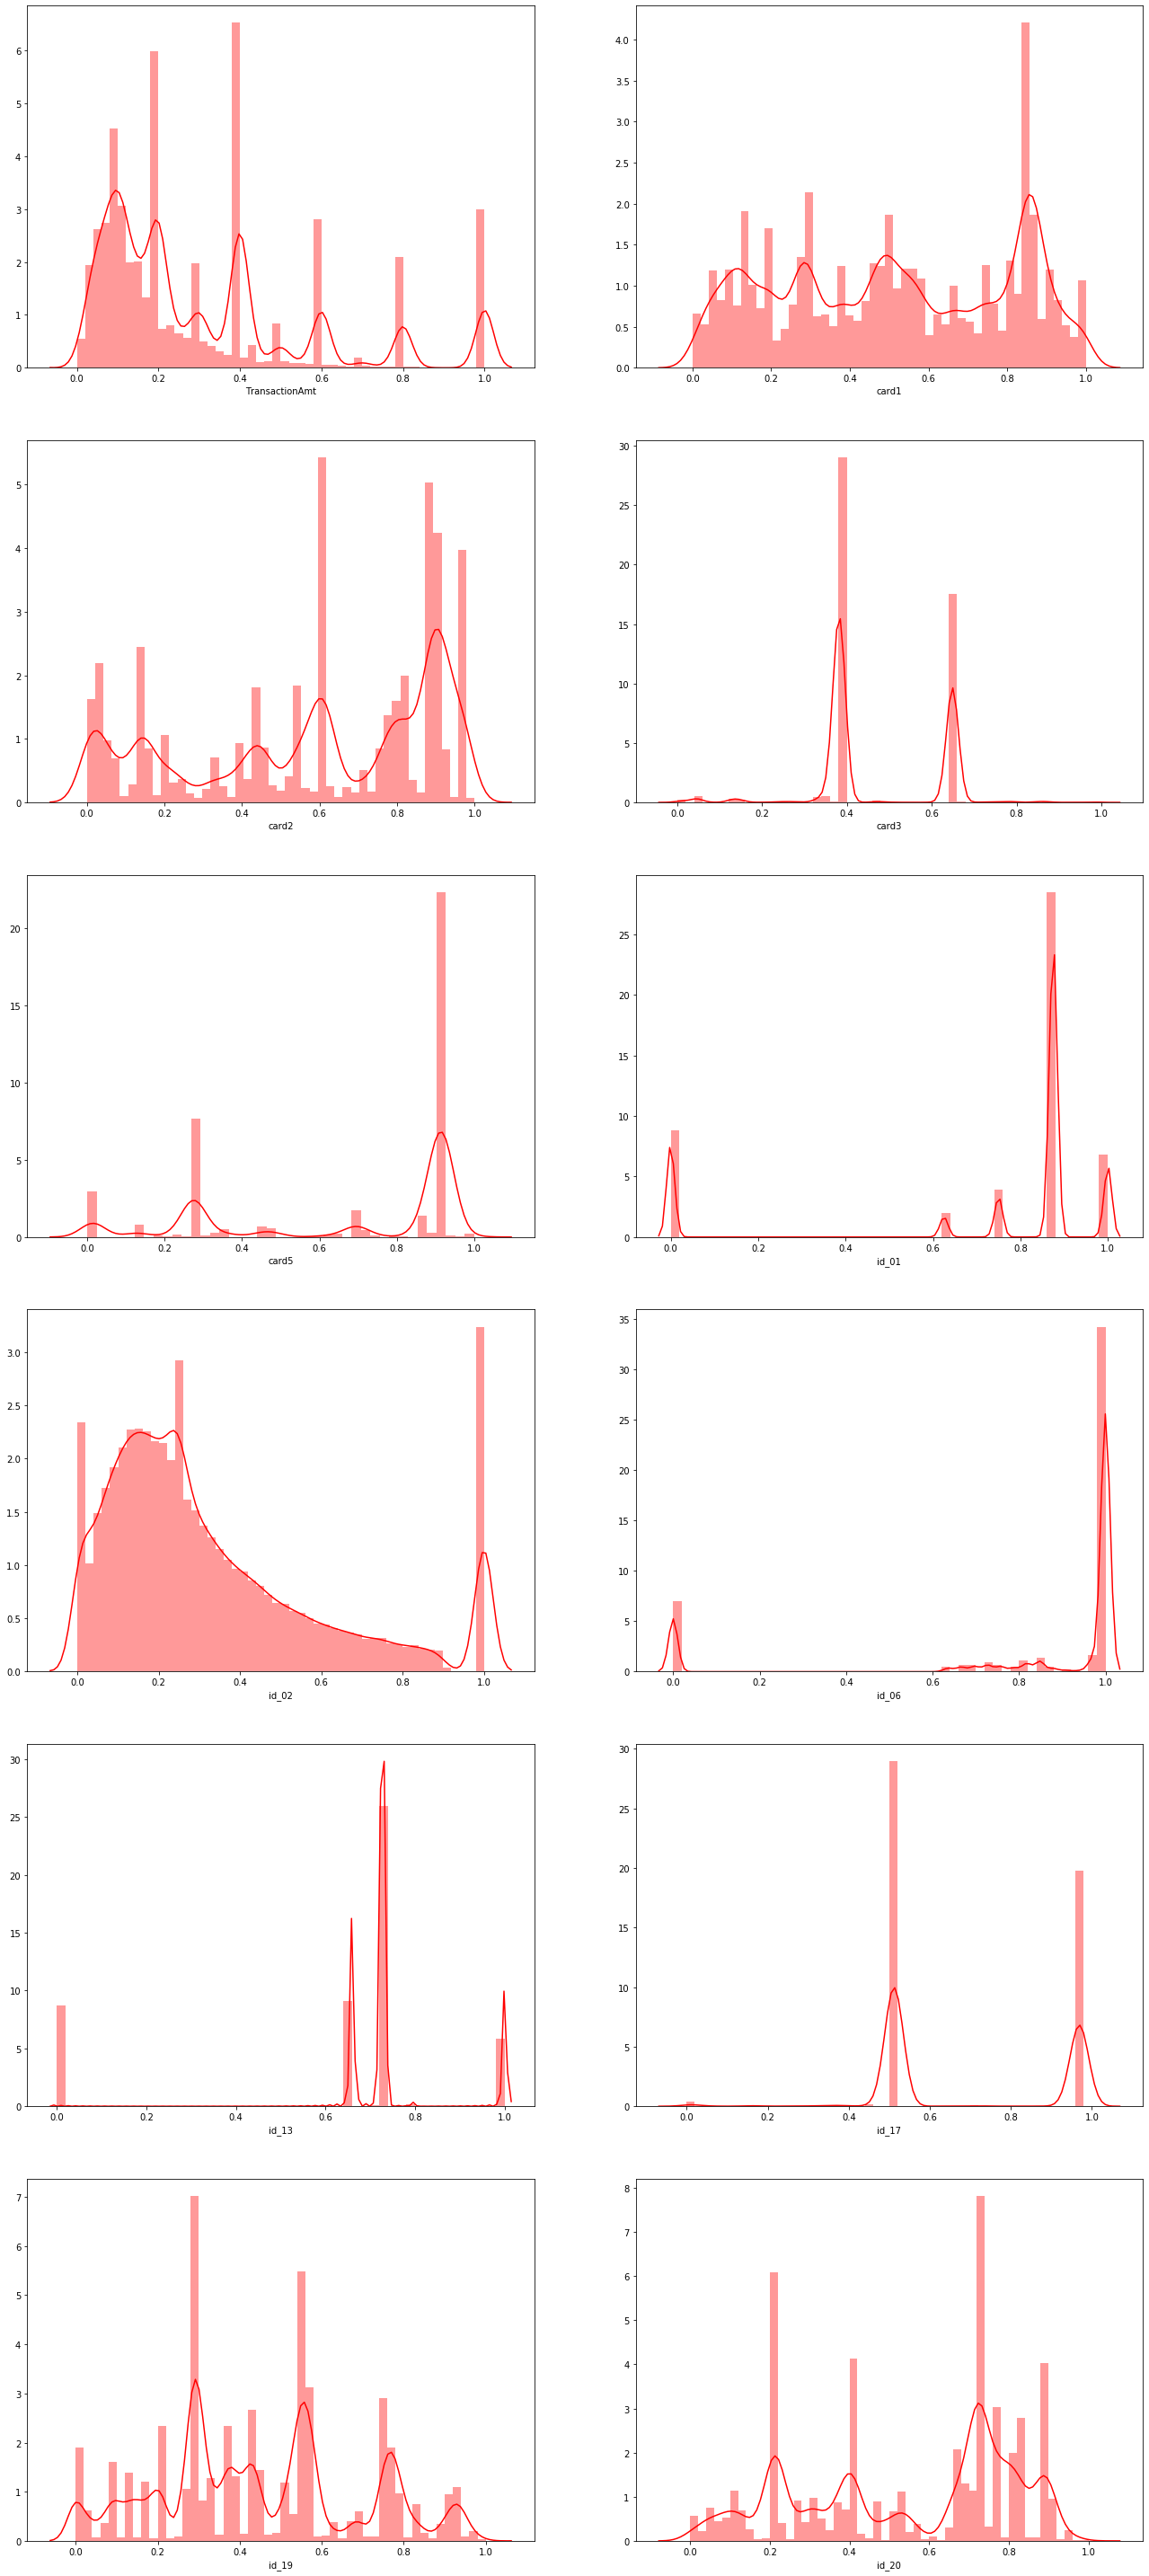

In [80]:
c = 1
plt.figure()
for i in num:
    plt.subplot(12,2,c)
    sns.distplot(data_normalized[i],color = 'r')
    c += 1
plt.subplots_adjust(right = 3,top = 20)
plt.show()

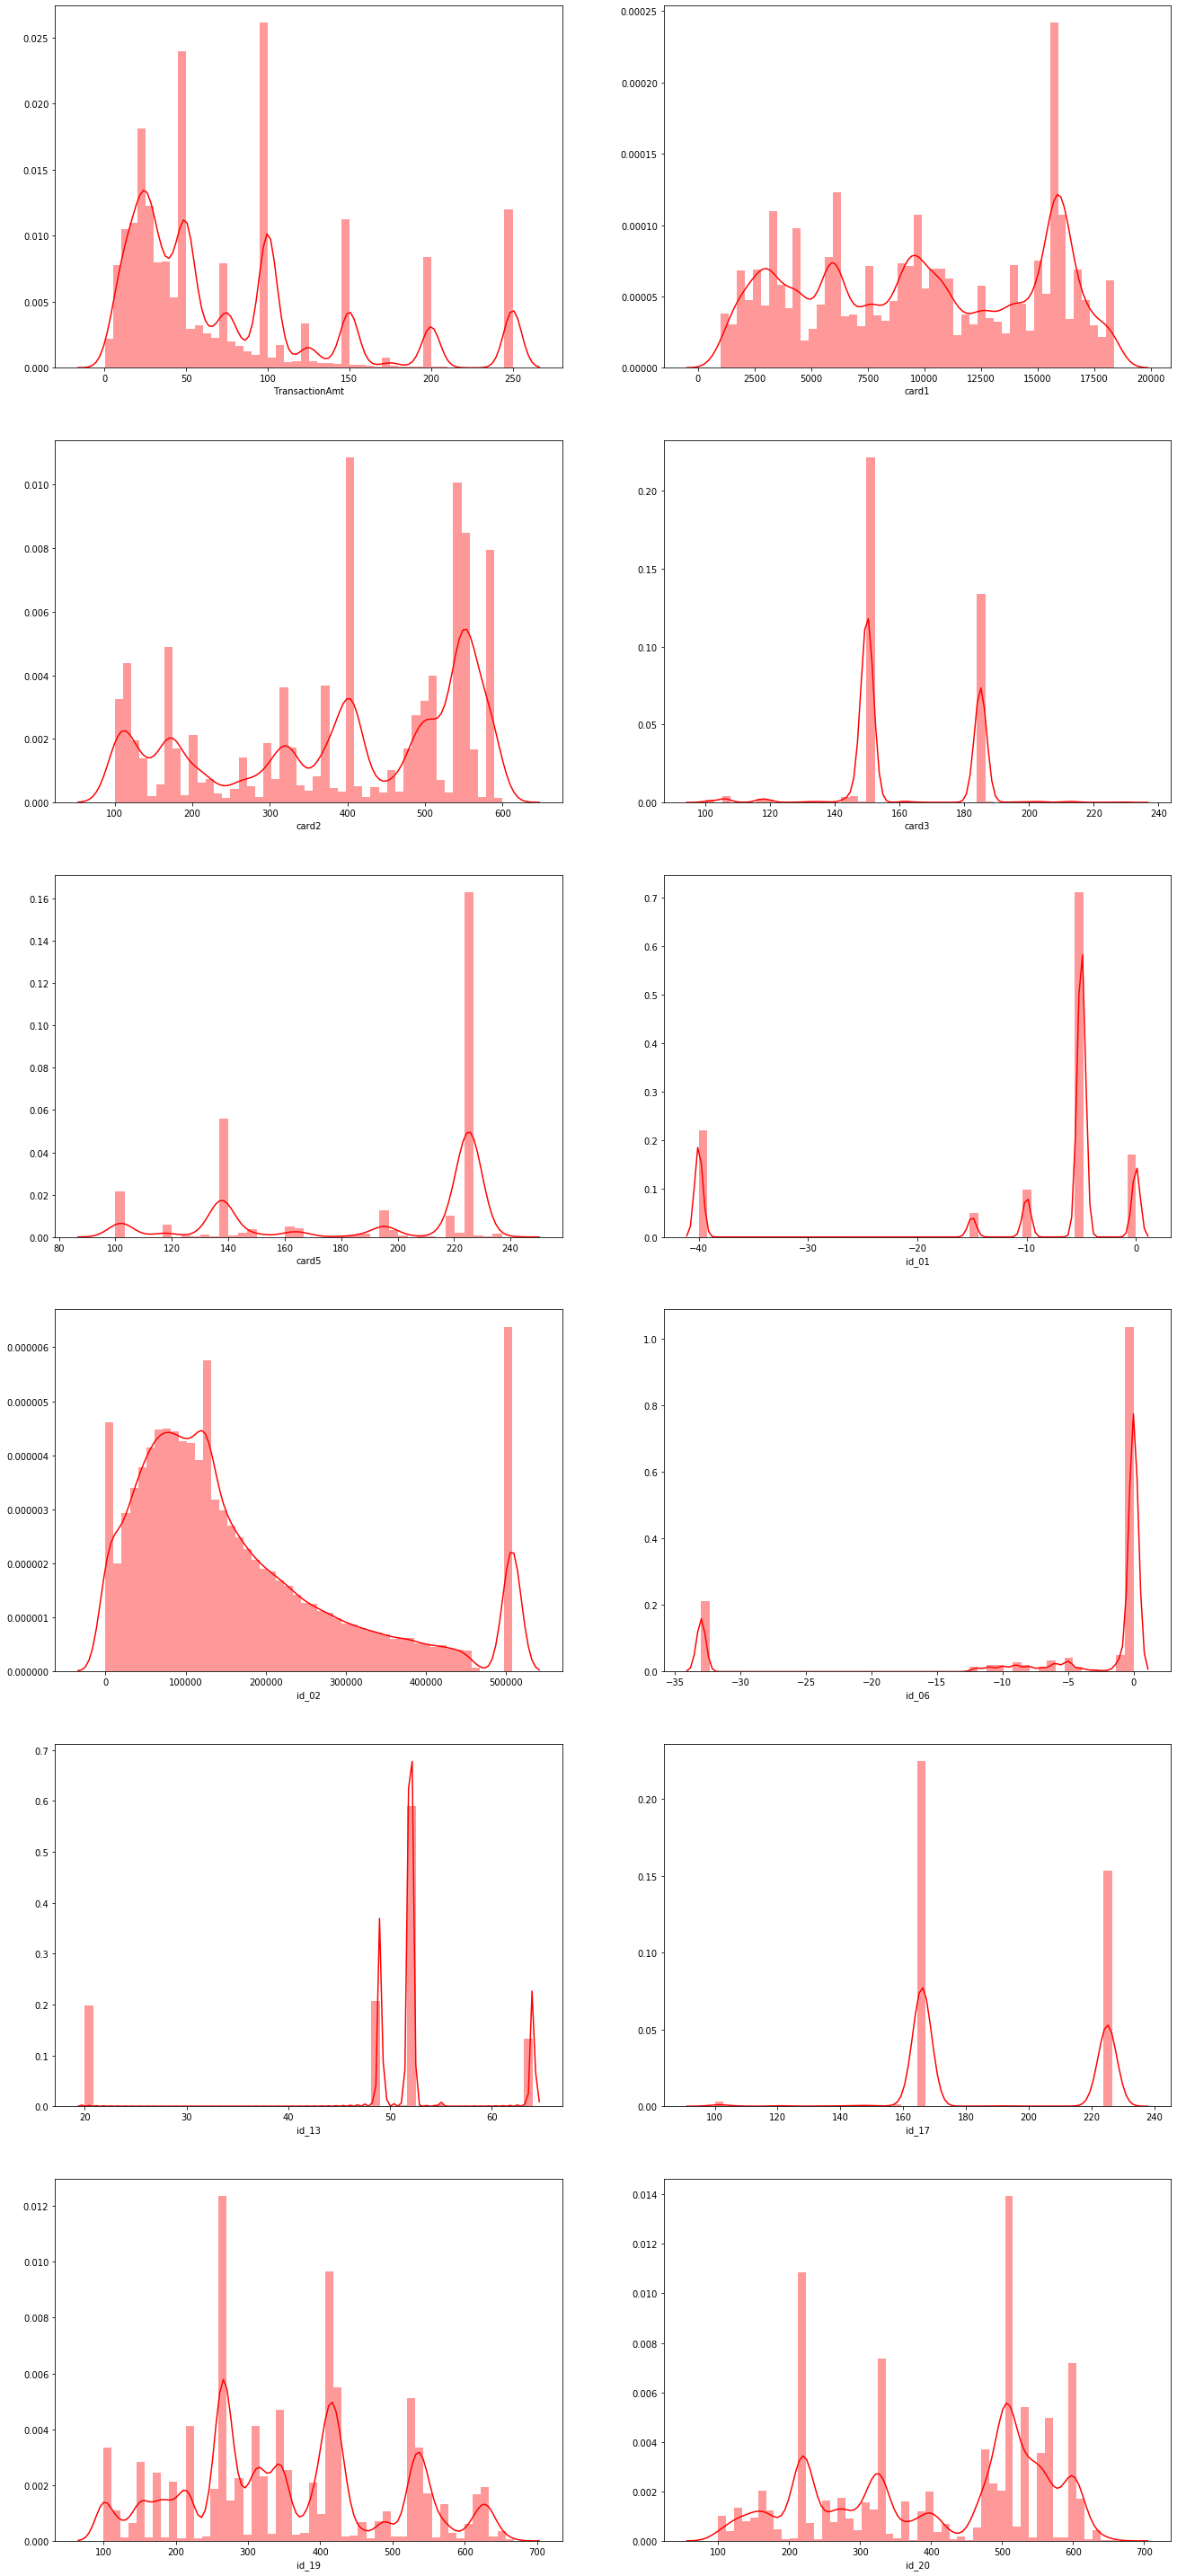

In [81]:
c = 1
plt.figure()
for i in num:
    plt.subplot(12,2,c)
    sns.distplot(data[i],color = 'r')
    c += 1
plt.subplots_adjust(right = 3,top = 20)
plt.show()

In [105]:
samp = list()
samp = random.sample(list(data_normalized['id_02']),100)

In [106]:
print(samp)

[1.0, 0.2812582402184544, 0.1370916152660973, 0.40978298442433686, 1.0, 0.10123767342149445, 0.41372449399885486, 0.04735920829262085, 0.17124479572929566, 0.00586890775645728, 0.7898193960897865, 0.4217888225883186, 0.2106263886430921, 0.0006089632292630287, 0.13272442265753137, 0.006268970978270855, 0.4473140385928971, 0.06621736085190215, 0.03279335965998964, 0.1290036376191864, 0.22886178268959956, 0.3222223492264198, 0.05751844922094096, 0.05896892474436358, 0.3200229868838388, 0.24617289274088255, 0.354046097531078, 1.0, 0.05338971794163337, 0.173789040159647, 0.8201808443422985, 0.29819096535058365, 0.40677955412855415, 0.12729105170905833, 0.3756160086776277, 0.44096426666834865, 0.0946849137538583, 0.034592658780757096, 0.1334969585341369, 0.6913545746539654, 0.27647521834977684, 0.006243351166036489, 0.6450516909273154, 0.09262153349159814, 0.46545483640961616, 0.5468903657287323, 1.0, 0.14097597295178477, 0.7642922093304207, 0.17764186576873833, 0.005453078496345632, 0.33765

In [107]:
mean = np.mean(samp)

In [108]:
var = np.var(samp)

In [109]:
var

0.06330206494983905

In [110]:
mean

0.30147979050088325

In [111]:
std=np.std(samp)

In [112]:
std

0.2515990161941001

In [113]:
train_transaction = pd.read_csv('train_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')

In [114]:
df = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)

In [115]:
df

,TransactionID_x,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
nullp = df.isnull().sum()*100/len(df)
nullpdf = pd.DataFrame({'column_name': df.columns,'percent_missing': nullp})

In [120]:
nullpdf.to_csv('data.csv')